# MNIST 데이터 준비 및 시각화

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 이미지 시각화 및 형상(shape) 확인해보기
image = x_train[0]
image.shape

(28, 28)

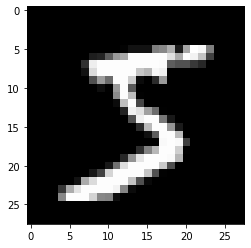

In [ ]:
plt.imshow(image, 'gray')
plt.show()

In [ ]:
# 실제 CNN 레이어에 집어 넣기 위해서는 4차원의 형태를 유지해야 한다
# (N, H, W, C) => (배치크기, 높이, 가로, 채널)
# MINST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1 채널
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv2D 레이어 사용하기
* Keras의 대표적인 CNN 레이어는 두가지가 있다.
 1. Conv2D
  * `stride`가 2방향으로 움직인다( 가로, 세로 )
  * 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어
 2. Conv1D
  * `stride`가 1방향으로 움직인다( 세로 )
  * 텍스트 분석을 위해 사용되는 레이어( `char CNN` )

----------
## 매개변수 정리
* `filters` : 필터의 개수
* `kernek_size` : 필터의 크기
* `strides` : 몇개의 픽셀을 스킵하면서 필터가 훑게 할지 결정
* `padding : 0으로 쌓여진 패딩을 만들 것인지에 대한 결정 
 * `VALID` : 패딩을 만들지 않기
 * `SAME` : 패딩 생성
* activation : 활성화 함수 지정하기, 따로 설정하지 않고 레이어로 추가 가능

In [ ]:
tf.keras.layers.Conv2D(
    filters = 3,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'SAME',
    activation = 'relu'
)

# Convolution 시각화

In [ ]:
# image를 tensorflow 배열로 만들기
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="SAME")

In [ ]:
# tensorflow에서 레이어에 데이터 전달 하는 방법
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

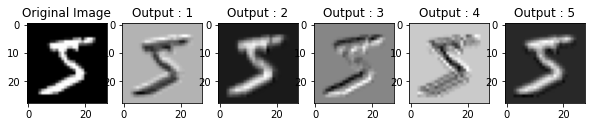

In [ ]:
# MINST 이미지 5에 대한 Conv 레이어 통과 후 시각화
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title('Original Image')

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output : {}".format(idx + 1))
  ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

# Filter 시각화 하기
* CNN에서 Filter의 역할은 실제 CNN레이어가 이미지의 무엇을 보고 있는 가를 이야기 한다.
* keras의 레이어들은 get_weight() 함수를 이용해서 편향과 가중치 등을 볼 수 있다.


In [ ]:
# keras의 모든 계산 가능한 레이어에서 매개변수 뽑아내기( 가중치, 편향 )
# layer - Conv2D 레이어 필터 모양 : (3, 3, 1, 5) - (필터 세로, 필터 가로, 채널 수, 필터 개수)
weight = layer.get_weights()

print("가중치의 형상 : {}".format(weight[0].shape))
print("편향의 형상 : {}".format(weight[1].shape))

가중치의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


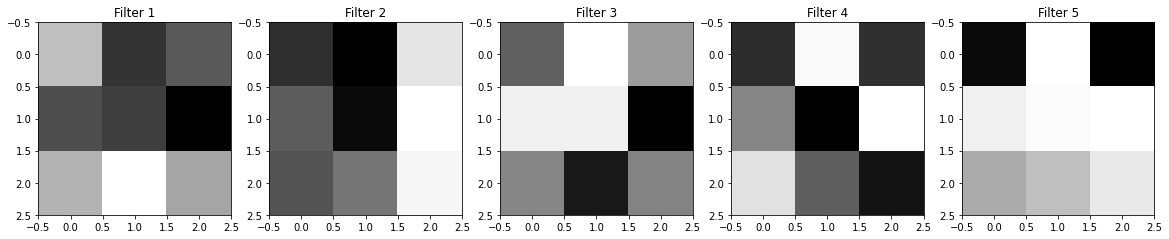

In [ ]:
# 시각화
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter {}".format(idx + 1))
  ax.imshow(weight[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 시각화
* 이미지 분석에서 ReLU가 자주 사용됩니다
* 이미지 데이터에서 음수데이터는 필요가 없는 데이터이다
 * 필요 없은 음수 데이터는 제거 하고, 의미있는 양수 데이터만 강조하기 위해 `ReLU`가 일반적으로 사용
 

In [ ]:
import numpy as np
np.min(output), np.max(output)

(-201.36647, 332.25052)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
act_output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 332.25052)

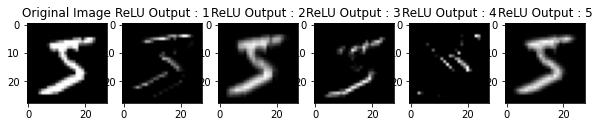

In [ ]:
# ReLU 레이어 통과 시키고 나서의 결과
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title('Original Image')

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling 레이어 확인하기
이미지 A와 이미지 B가 예를 들어 1px 정도만 차이나는 굉장히 유사한 이미지라면, 그 결과물도 유사라게 나타나게 하기 위한 처리


In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME")
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

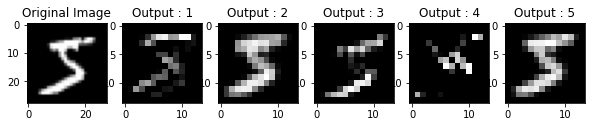

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title('Original Image')

for idx, ax in enumerate(axes[1:]):
  ax.set_title("Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

예측을 위한 과정 만들기
* Flatten - 예측을 하겠다 라는 이야기는 $WX+B$를 하겠다라는 의미
* 즉 모든 데이터는 1차원 형태로 만들어져서 뉴런으로 들어가야 한다

# Flatten 레이어 확인하기
* MaxPool2D 까지는 특징 추출 과정
  * 예측을 하기 위한 과정이 아닌, 데이터에 대한 특징만 추출
* 예측을 하기 위해서는 Fully Connected 과정이 필요하다
  * Dense 레이어 사용
* Fully Connected Layer를 사용하기 위해서는 데이터가 평탄화 되어 있어야 한다.

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape # (1, 14, 14, 5) 형상의 데이터에서 배치크기 정보(1)를 제외한 픽셀, 필터 개수 정보가 모두 곱해진다

TensorShape([1, 980])

# Dense 레이어 확인하기( Affine )
* 계산 과정($WX+B$)을 위한 Dense 레이어 - Fully Connected 레이어 라고도 한다

In [ ]:
# 유닛이 32개인 Dense 레이어 만들기
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [ ]:
# 출력층 설계
# 숫자의 개수는 10개 출력층의 output 개수도 10개
dense_layer2 = tf.keras.layers.Dense(10, activation='softmax')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

# Keras를 활용한 CNN 레이어 종합
* 합성곱 레이어를 두번 통과
* 은닉층 1개
* 출력층 1개 

In [ ]:
# 특성 추출을 위한 레이어 준비 ( Conv2D, Activation, MaxPool2D )
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D
# 데이터 입력을 위한 레이어( Input )
from tensorflow.keras.layers import Input
# Classification을 위한 레이어( Fully Connected Layer 재료 - Dense, Dropour, Flatten)
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [ ]:
# 1. 입력 데이터의 형상( 배치 사이즈를 제외한 ...)
input_shape = (28, 28, 1)

# 2. 분류할 클래스의 개수
num_classes = 10


In [ ]:
# 원본 데이터를 입력받는 데이터
inputs = Input(shape= input_shape)

# Feature Extraction( 특징 추출 ) - Convolution 레이어
net = Conv2D(32, 3, padding="SAME")(inputs)
net = Activation('relu')(net)
net = Conv2D(32, 3, padding="SAME")(net)
net = Activation('relu')(net)
net = MaxPool2D((2, 2))(net)
net = Dropout(0.25)(net) # 가중치를 0으로 만들 데이터의 비율 지정( 즉, 사용하지 않을 데이터의 비율을 지정 ) - 과대적합을 방지

net = Conv2D(64, 3, padding="SAME")(net)
net = Activation('relu')(net)
net = Conv2D(64, 3, padding="SAME")(net)
net = Activation('relu')(net)
net = MaxPool2D((2, 2))(net)
net = Dropout(0.25)(net)

# Fully Connected 구성
net = Flatten()(net)
net = Dense(512)(net)
net = Activation('relu')(net)
net = Dropout(0.25)(net)

# 출력층 구성
net = Dense(num_classes)(net)
net = Activation('softmax')(net)


텐서플로우는 계산 그래프를 먼저 그린다 - 모델 생성 단계

In [ ]:
# 계산 그래프 그리기
model = tf.keras.Model(inputs=inputs, outputs=net, name="CNN_practice")

In [ ]:
model.summary()

Model: "CNN_practice"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)       

# 최적화 선정하기
* Loss Function(손실 함수) - MSE, CEE 결정을 해주기
* Optimization(최적화 함수) - SGD, ADAM, RMSProps를 많이 사용
* Metrics(테스트 세트, 검증세트에 대한 평가 기준) - accuracy 많이 사용

## Loss Function 기준
* Binary Classifiaction
  * binary_crossentropy
  * 보통 출력층의 뉴런 개수가 1개
  * sigmoid 함수를 출력층의 활성화 함수로 사용
* Categorical Classification
  * categorical_crossentropy를 사용
  * 출력의 뉴런 개수가 2개 이상
  * softmax 함수를 출력층의 활성화 함수로 사용

### Categotical Cross Entropy Error의 종류
* label의 형식이 0, 1, 2 같은 형태면
  * sparse_categorical_cross_entropy 를 사용
* label의 형식이 One Hot Encoding이 되어 있으면
  * categorical_cross_entropy를 사용

In [ ]:
# Loss 함수 선정을 위해 y_train을 확인
y_train[:3]

array([5, 0, 4], dtype=uint8)

y_train의 원소 값이 [5, 0, 4] 형태이다
* sparse_categorical_cross_entropy를 사용
* y_train을 One Hot Encoding 한 다음 사용

In [ ]:
# 함수 형태
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [ ]:
# 클래스 형태
tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
# 만약에 레이블이 One 되어 있으면 쓰자
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [ ]:
# 이진 분류 시에 사용
tf.keras.losses.binary_crossentropy

## Metrics
* 테스트용 또는 검증 세트의 평가 방식(evaluate)

In [ ]:
metrics = ['accuracy']

## Optimizer 선정하기
* sgd - tf.keras.optimizer.SGD()
* rmsprop - tf.keras.optimizer.RMSprop()
* adam - tf.keras.optimizer.Adam()

In [ ]:
optimizer = tf.keras.optimizers.Adam()

# 모델 컴파일
* 모델을 실제 세션에 만들어 주는 과정
* 데이터를 흘려보내기 직전 단계

In [ ]:
model.compile(optimizer=optimizer, loss=loss_func, metrics=metrics)

# 학습 1단계
* 데이터 전처리

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 채널 차원을 추가
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# 정규화 작업(스케일링 처리)
# 이미지 데이터의 전처리는 255.0으로 나눠주면 된다
x_train = x_train / 255.0
x_test = x_test / 255.0

np.min(x_train), np.max(x_train)

(0.0, 1.0)

# 학습용 하이퍼 파라미터 설정
* 에폭 횟수
* 배치 크기

In [ ]:
num_epochs = 10
batch_size = 12

# 학습 수행하기
* fit 활용하기

In [ ]:
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs=num_epochs,
          shuffle=True)

Epoch 1/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.2450 - accuracy: 0.9215
Epoch 2/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0574 - accuracy: 0.9827
Epoch 3/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0403 - accuracy: 0.9881
Epoch 4/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0355 - accuracy: 0.9894
Epoch 5/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0347 - accuracy: 0.9905
Epoch 6/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 7/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0288 - accuracy: 0.9918
Epoch 8/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0262 - accuracy: 0.9928
Epoch 9/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0259 - accuracy: 0.9921
Epoch 10/10
5000/5000 [==============================] - 13s 3ms/step - l

# 모델 최종 검증하기
* evaluate

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9929


[0.026139074936509132, 0.992900013923645]

# 에측하기
* prediction 해보기

<function matplotlib.pyplot.show>

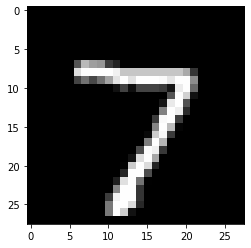

In [ ]:
# test 이미지 준비하기
test_img = x_test[0, ..., 0]
plt.imshow(test_img, 'gray')
plt.show()

In [ ]:
y_test[0]

7

예측용 데이터의 처리
* 훈련용 데이터의 shape 과 일치해야 한다

In [ ]:
test_img.shape

(28, 28)

In [ ]:
test_img = test_img[tf.newaxis, ..., tf.newaxis]
test_img.shape

(1, 28, 28, 1)

In [ ]:
prediction = model.predict(test_img)

In [ ]:
print("softmax 결과 : {}\n".format(prediction))

softmax 결과 : [[2.1783186e-22 1.4773406e-11 9.5608504e-12 1.3736613e-12 2.3380943e-12
  3.0819532e-17 6.6430400e-23 1.0000000e+00 2.6589807e-16 4.5468924e-12]]



In [ ]:
# 예측과 정답이 맞는지 비교
np.argmax(prediction) == y_test[0]

True